In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
small_model_size = 7
large_model_size = 14

## Hierarchical Routing

In [25]:
# Example 11: Analyze prompts from a file and get true token lengths
print("\n")
print("=" * 80)
print("ANALYZE PROMPTS FROM FILE")
print("=" * 80)

from router_system.compute_flops import reliability_cost_tradeoff_for_different_thresholds_hierarchical_routing

file_path = './generate_dataset/datasets/MMLU/mmlu_auxiliary_and_all_with_correct_counts_n5_val.pkl'  # Example path
cpx_prob_dir = 'cpx_model/inference_logs/probabilities_20251116-214238.pkl'
bert_prob_dir = 'bert_routing/inference_logs/probabilities_20251117-151544.pkl'
hierarchical_routing_tradeoff_results = reliability_cost_tradeoff_for_different_thresholds_hierarchical_routing(file_path, cpx_prob_dir, bert_prob_dir, small_model_size, large_model_size)
   



ANALYZE PROMPTS FROM FILE


Computing reliability for different thresholds: 100%|██████████| 9604/9604 [00:18<00:00, 517.95it/s]


Tokenizing 11023 prompts...
m1_decode_flops: 0.243473722505, m2_decode_flops: 0.342160661528, m1_prefill_flops: 6.602336451148, m2_prefill_flops: 9.27855611443, deberta_flops: 0.3533274222884742


Computing FLOPs for different thresholds: 100%|██████████| 9604/9604 [00:26<00:00, 361.96it/s]


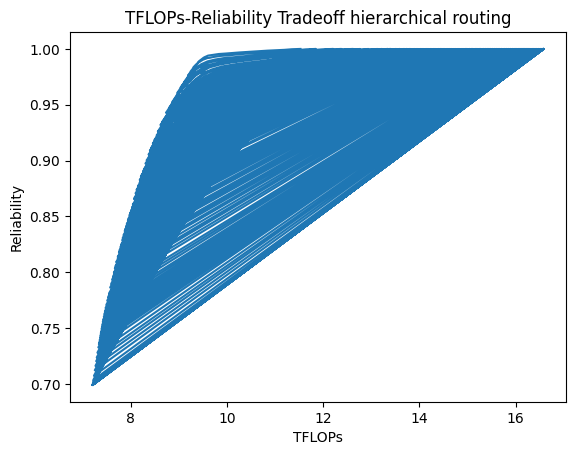

In [30]:
from matplotlib import pyplot as plt
hierarchical_routing_costs = []
hierarchical_routing_reliabilities = []

for comb in hierarchical_routing_tradeoff_results:
    hierarchical_routing_costs.append(hierarchical_routing_tradeoff_results[comb]['flops'])
    hierarchical_routing_reliabilities.append(hierarchical_routing_tradeoff_results[comb]['reliability'])

# hierarchical_routing_costs = [cost / max_cost for cost in hierarchical_routing_costs]
hierarchical_routing_costs = [cost / 1e12 for cost in hierarchical_routing_costs]
plt.plot(hierarchical_routing_costs, hierarchical_routing_reliabilities)
plt.title('TFLOPs-Reliability Tradeoff hierarchical routing')
plt.xlabel('TFLOPs')
plt.ylabel('Reliability')
plt.show()

239


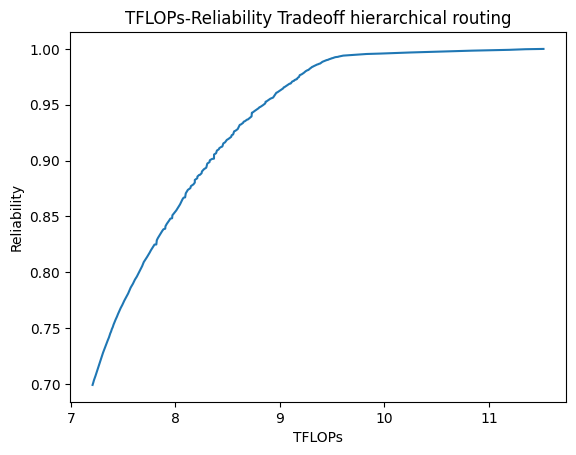

In [31]:
from router_system.compute_flops import get_pareto_front

hierarchical_routing_pareto_front_results = get_pareto_front(hierarchical_routing_costs, hierarchical_routing_reliabilities)
hierarchical_routing_pareto_front_costs = [result[0] for result in hierarchical_routing_pareto_front_results]
hierarchical_routing_pareto_front_reliabilities = [result[1] for result in hierarchical_routing_pareto_front_results]
print(len(hierarchical_routing_pareto_front_costs))
plt.plot(hierarchical_routing_pareto_front_costs, hierarchical_routing_pareto_front_reliabilities)
plt.title('TFLOPs-Reliability Tradeoff hierarchical routing')
plt.xlabel('TFLOPs')
plt.ylabel('Reliability')
plt.show()


## BERT only routing

In [28]:
from router_system.compute_flops import reliability_cost_tradeoff_for_different_thresholds_bert_routing

input_path = './generate_dataset/datasets/MMLU/mmlu_auxiliary_and_all_with_correct_counts_n5_val.pkl'
bert_prob_dir = 'bert_routing/inference_logs/probabilities_20251117-151544.pkl'
bert_routing_tradeoff_results = reliability_cost_tradeoff_for_different_thresholds_bert_routing(input_path, bert_prob_dir, small_model_size, large_model_size)
bert_routing_costs = []
bert_routing_reliabilities = []
bert_routing_percantage_to_large_model = []

for comb in bert_routing_tradeoff_results:
    bert_routing_costs.append(bert_routing_tradeoff_results[comb]['flops'])
    bert_routing_reliabilities.append(bert_routing_tradeoff_results[comb]['reliability'])
    bert_routing_percantage_to_large_model.append(bert_routing_tradeoff_results[comb]['sent_to_large_model'] / bert_routing_tradeoff_results[comb]['total_count'])
max_cost = max(bert_routing_costs)
# bert_routing_costs = [cost / max_cost for cost in bert_routing_costs]
bert_routing_costs = [cost / 1e12 for cost in bert_routing_costs]
plt.plot(bert_routing_costs, bert_routing_reliabilities)
plt.title('TFLOPs-Reliability Tradeoff bert routing')
plt.xlabel('TFLOPs')
plt.ylabel('Reliability')
plt.show()

Computing reliability for different thresholds: 100%|██████████| 101/101 [00:00<00:00, 803.38it/s]


Tokenizing 11023 prompts...


IndexError: invalid index to scalar variable.

## CPX only Routing

Computing reliability for different thresholds: 100%|██████████| 101/101 [00:00<00:00, 831.70it/s]


Tokenizing 11023 prompts...


Computing FLOPs for different thresholds: 100%|██████████| 101/101 [00:00<00:00, 525.14it/s]


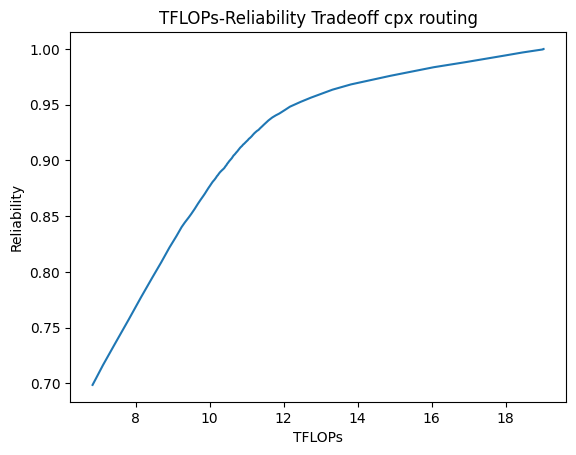

In [ ]:
from router_system.compute_flops import reliability_cost_tradeoff_for_different_thresholds_cpx_routing

input_path = './generate_dataset/datasets/MMLU/mmlu_auxiliary_and_all_with_correct_counts_n5_val.pkl'
cpx_prob_dir = 'cpx_model/inference_logs/probabilities_20251116-214238.pkl'
cpx_routing_tradeoff_results = reliability_cost_tradeoff_for_different_thresholds_cpx_routing(input_path, cpx_prob_dir, small_model_size, large_model_size)
cpx_routing_flops = []
cpx_routing_reliabilities = []
cpx_routing_percentage_to_large_model = []

for comb in cpx_routing_tradeoff_results:
    cpx_routing_flops.append(cpx_routing_tradeoff_results[comb]['flops']/1e12)
    cpx_routing_reliabilities.append(cpx_routing_tradeoff_results[comb]['reliability'])
    cpx_routing_percentage_to_large_model.append((cpx_routing_tradeoff_results[comb]['sent_to_large_model'] / cpx_routing_tradeoff_results[comb]['total_count']) * 100)

plt.plot(cpx_routing_flops, cpx_routing_reliabilities)
plt.title('TFLOPs-Reliability Tradeoff cpx routing')
plt.xlabel('TFLOPs')
plt.ylabel('Reliability')
plt.show()

## Plot both bert routing and hierarchical routing

In [ ]:
import matplotlib.ticker as ticker

# Plot the pareto front for both bert routing and hierarchical routing with legend logarithmic
plt.plot(hierarchical_routing_pareto_front_costs, hierarchical_routing_pareto_front_reliabilities)
plt.plot(bert_routing_costs, bert_routing_reliabilities)
plt.plot(cpx_routing_flops, cpx_routing_reliabilities)
plt.title('TFLOPs-Reliability Tradeoff')
plt.xlabel('TFLOPs')
plt.ylabel('Reliability')
plt.ylim(0.94, )
plt.legend(['Hierarchical Routing', 'BERT Routing', 'CPX Routing'])
plt.grid(True, which="both", ls="--", color='gray', alpha=0.5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2)) 
# Minor ticks appear every 1.0 unit (half of the major step)
# plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

Text(0, 0.5, 'Reliability')

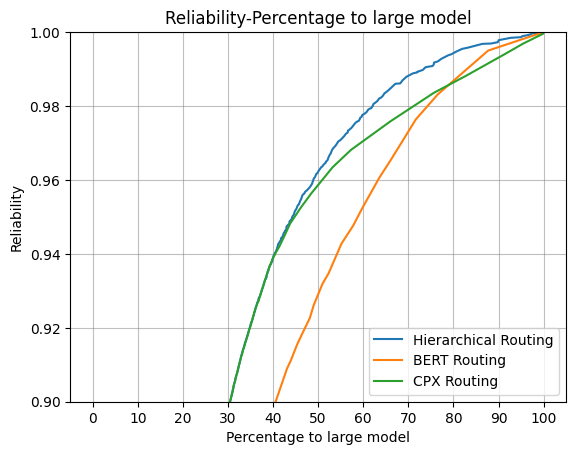

In [ ]:
hierarchical_routing_percentage_to_large_model = []
for comb in hierarchical_routing_tradeoff_results:
    hierarchical_routing_percentage_to_large_model.append((hierarchical_routing_tradeoff_results[comb]['sent_to_large_model'] / hierarchical_routing_tradeoff_results[comb]['total_count']) * 100)
pareto_front_hierarchical_routing = get_pareto_front(hierarchical_routing_percentage_to_large_model, hierarchical_routing_reliabilities)
pareto_front_hierarchical_routing_percentage_to_large_model = [result[0] for result in pareto_front_hierarchical_routing]
pareto_front_hierarchical_routing_reliabilities = [result[1] for result in pareto_front_hierarchical_routing]

bert_routing_percentage_to_large_model = []
for comb in bert_routing_tradeoff_results:
    bert_routing_percentage_to_large_model.append((bert_routing_tradeoff_results[comb]['sent_to_large_model'] / bert_routing_tradeoff_results[comb]['total_count']) * 100)
plt.plot(pareto_front_hierarchical_routing_percentage_to_large_model, pareto_front_hierarchical_routing_reliabilities)
plt.plot(bert_routing_percentage_to_large_model, bert_routing_reliabilities)
plt.plot(cpx_routing_percentage_to_large_model, cpx_routing_reliabilities)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.ylim(0.9, 1)
plt.grid(True, which="both", ls="-", color='gray', alpha=0.5)
plt.title('Reliability-Percentage to large model')
plt.legend(['Hierarchical Routing', 'BERT Routing', 'CPX Routing'], loc='lower right')
plt.xlabel('Percentage to large model')
plt.ylabel('Reliability')